 - **EntitySet**: 여러 개의 엔티티(데이터프레임)를 관리하는 객체입니다. 이를 통해 데이터 간의 관계를 정의하고, 피처 엔지니어링을 위한 기초를 마련합니다.
     - `EntitySet()`을 사용해 새로운 EntitySet을 생성.
     - `add_dataframe()`: EntitySet에 데이터프레임을 추가.
     - `normalize_dataframe()`: 데이터프레임을 정규화하여 새로운 엔티티를 생성하고, 자동으로 관계를 설정.


- **Relationships**: 서로 다른 엔티티 간의 부모-자식 관계를 정의합니다.
     - `add_relationship()`: 두 엔티티 간의 관계를 정의하고 EntitySet에 추가.

- **DFS**: 주어진 엔티티셋(EntitySet)과 관계를 기반으로 피처를 자동으로 생성하는 핵심 기능.
     - `ft.dfs()`: 자동 피처 생성 함수로, 다양한 설정을 통해 피처를 생성.
     - 주요 하이퍼파라미터:
       - `entityset`: DFS를 적용할 엔티티셋.
       - `target_dataframe_name`: 피처를 생성할 타겟 엔티티.
       - `max_depth`: 생성할 피처의 복잡성(깊이)를 설정.
       - `agg_primitives`: 집계 프리미티브(예: `sum`, `mean` 등)를 지정.
       - `trans_primitives`: 변환 프리미티브(예: `day`, `month`, `divide` 등)를 지정.

### 1. **기본 제공 프리미티브**

`FeatureTools`는 다양한 기본 제공 프리미티브를 제공합니다. 이들은 변환과 집계 작업에 사용될 수 있습니다.

#### **변환 프리미티브 (Transformation Primitives)**
변환 프리미티브는 데이터의 개별 행에 대해 변환 작업을 수행합니다.

- **Math Operations**:
  - `Absolute`: 절대값을 반환합니다.
  - `AddNumeric`: 두 숫자를 더합니다.
  - `SubtractNumeric`: 두 숫자를 뺍니다.
  - `MultiplyNumeric`: 두 숫자를 곱합니다.
  - `DivideNumeric`: 두 숫자를 나눕니다.

- **Datetime Transformations**:
  - `Year`: 날짜에서 연도를 추출합니다.
  - `Month`: 날짜에서 월을 추출합니다.
  - `Day`: 날짜에서 일을 추출합니다.
  - `Hour`: 시간에서 시각을 추출합니다.
  - `DayOfWeek`: 날짜에서 요일을 추출합니다.
  - `IsWeekend`: 날짜가 주말인지 여부를 반환합니다.

- **Text Transformations**:
  - `Upper`: 텍스트를 모두 대문자로 변환합니다.
  - `Lower`: 텍스트를 모두 소문자로 변환합니다.
  - `Len`: 텍스트의 길이를 반환합니다.

- **Other Transformations**:
  - `IsNull`: 값이 null인지 확인합니다.
  - `Not`: 논리 NOT 연산을 수행합니다.
  - `Percentile`: 값의 백분위를 반환합니다.

#### **집계 프리미티브 (Aggregation Primitives)**
집계 프리미티브는 그룹화된 데이터에서 요약 통계를 생성합니다.

- **Statistical Aggregations**:
  - `Sum`: 합계를 계산합니다.
  - `Mean`: 평균을 계산합니다.
  - `Min`: 최소값을 반환합니다.
  - `Max`: 최대값을 반환합니다.
  - `Std`: 표준 편차를 계산합니다.
  - `Count`: 개수를 계산합니다.
  - `Median`: 중위수를 계산합니다.
  - `Mode`: 최빈값을 반환합니다.

- **Time-based Aggregations**:
  - `TimeSinceLast`: 마지막 발생 이후 경과 시간을 계산합니다.
  - `TimeSinceFirst`: 첫 발생 이후 경과 시간을 계산합니다.

- **Custom Aggregations**:
  - `NumUnique`: 고유 값의 수를 계산합니다.
  - `NumTrue`: 참(`True`) 값의 수를 계산합니다.
  - `Any`: 하나 이상의 참(`True`) 값이 있는지 확인합니다.
  - `All`: 모든 값이 참(`True`)인지 확인합니다.


In [1]:
import featuretools as ft
import pandas as pd

- 엔티티(Entity) - 데이터베이스 RDBMS 구조
- 엔티티셋(Entityset)- 엔티티간의 관계 정의한 집합

--- 
- 자동으로 피처를 생성해준다. 
- DFS ( Deep Feature Synthesis ) 
    - 데이터생성의 핵심기능 
    - DFS 엔티티간의 관계를 활용해서 깊이 있는 피처를 (유의미한) 만든다. 
    
--- 
- 프리미티브 (primitives)
- 피처 생성 함수 ( featuretools에서 어떤 함수로 피처를 만들래 ? 제공하는 함수 )
    - 변환 (Transformer Primitives) - 데이터의 변환 연도, 월, 일 등의 수치 데이터 변환 
    - 집계 (Aggregation Primitives) - 요약 집계, 기초통계치 ( 평균, sum 등등 )

In [2]:
## 데이터 준비 예시 데이터

#고객 테이블
customer_df = pd.DataFrame({
    'customer_id' : [1,2,3],
    'join_date' : ['2024-01-01','2024-02-01','2024-03-01'],
    'region':['north','east','south']
})


orders_df = pd.DataFrame({
    'order_id' : [1,2,3,4,5],
    'customer_id':[1,1,2,2,3],
    'order_date' : ['2024-04-10','2024-04-11','2024-04-15','2024-05-21','2024-07-05'],
    'amount':[10000,20000,30000,40000,45000]
})


In [3]:
## Entityset 생성
es =ft.EntitySet()

## 엔티티 추가

es =es.add_dataframe(dataframe_name = 'customers', dataframe=customer_df, index = 'customer_id')
es =es.add_dataframe(dataframe_name = 'orders', dataframe=orders_df, index = 'order_id')

In [4]:
## 관계 설정 및 추가
relationship = es.add_relationship(
    parent_dataframe_name = 'customers',
    parent_column_name = 'customer_id',
    child_dataframe_name = 'orders',
    child_column_name = 'customer_id'
)

In [5]:
relationship

Entityset: None
  DataFrames:
    customers [Rows: 3, Columns: 3]
    orders [Rows: 5, Columns: 4]
  Relationships:
    orders.customer_id -> customers.customer_id

In [6]:
## 자동 피처 생성
feature_matrix, feature_defs =ft.dfs(entityset= es, target_dataframe_name = 'customers', max_depth=2)

In [7]:
orders_df

,order_id,customer_id,order_date,amount
1,1,1,2024-04-10,10000
2,2,1,2024-04-11,20000
3,3,2,2024-04-15,30000
4,4,2,2024-05-21,40000
5,5,3,2024-07-05,45000


In [8]:
feature_matrix

,COUNT(orders),MAX(orders.amount),MEAN(orders.amount),MIN(orders.amount),SKEW(orders.amount),STD(orders.amount),SUM(orders.amount),DAY(join_date),MONTH(join_date),WEEKDAY(join_date),YEAR(join_date),MODE(orders.DAY(order_date)),MODE(orders.MONTH(order_date)),MODE(orders.WEEKDAY(order_date)),MODE(orders.YEAR(order_date)),NUM_UNIQUE(orders.DAY(order_date)),NUM_UNIQUE(orders.MONTH(order_date)),NUM_UNIQUE(orders.WEEKDAY(order_date)),NUM_UNIQUE(orders.YEAR(order_date))
customer_id,,,,,,,,,,,,,,,,,,,
1,2,20000.0,15000.0,10000.0,NaN,7071.067812,30000.0,1,1,0,2024,10,4,2,2024,2,1,2,1
2,2,40000.0,35000.0,30000.0,NaN,7071.067812,70000.0,1,2,3,2024,15,4,0,2024,2,2,2,1
3,1,45000.0,45000.0,45000.0,NaN,NaN,45000.0,1,3,4,2024,5,7,4,2024,1,1,1,1


In [9]:
feature_defs

[<Feature: COUNT(orders)>,
 <Feature: MAX(orders.amount)>,
 <Feature: MEAN(orders.amount)>,
 <Feature: MIN(orders.amount)>,
 <Feature: SKEW(orders.amount)>,
 <Feature: STD(orders.amount)>,
 <Feature: SUM(orders.amount)>,
 <Feature: DAY(join_date)>,
 <Feature: MONTH(join_date)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: YEAR(join_date)>,
 <Feature: MODE(orders.DAY(order_date))>,
 <Feature: MODE(orders.MONTH(order_date))>,
 <Feature: MODE(orders.WEEKDAY(order_date))>,
 <Feature: MODE(orders.YEAR(order_date))>,
 <Feature: NUM_UNIQUE(orders.DAY(order_date))>,
 <Feature: NUM_UNIQUE(orders.MONTH(order_date))>,
 <Feature: NUM_UNIQUE(orders.WEEKDAY(order_date))>,
 <Feature: NUM_UNIQUE(orders.YEAR(order_date))>]

In [10]:
## 옵션을 추가 

## 자동 피처 생성
feature_matrix, feature_defs =ft.dfs(
    entityset= es, target_dataframe_name = 'customers',trans_primitives = ['Year', 'Month'] ,max_depth=2
)

In [11]:
feature_matrix

,COUNT(orders),MAX(orders.amount),MEAN(orders.amount),MIN(orders.amount),SKEW(orders.amount),STD(orders.amount),SUM(orders.amount),MONTH(join_date),YEAR(join_date),MODE(orders.MONTH(order_date)),MODE(orders.YEAR(order_date)),NUM_UNIQUE(orders.MONTH(order_date)),NUM_UNIQUE(orders.YEAR(order_date))
customer_id,,,,,,,,,,,,,
1,2,20000.0,15000.0,10000.0,NaN,7071.067812,30000.0,1,2024,4,2024,1,1
2,2,40000.0,35000.0,30000.0,NaN,7071.067812,70000.0,2,2024,4,2024,2,1
3,1,45000.0,45000.0,45000.0,NaN,NaN,45000.0,3,2024,7,2024,1,1


In [12]:
df = pd.read_excel('Online_retail_II.xlsx')

In [13]:
#데이터셋 샘플 10,000개 추출
df=df.loc[:10000]
df=df.dropna()

In [14]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
9672,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom
9673,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom
9674,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom
9675,490147,21490,SET OF THREE 50'S GIFT WRAPS,48,2009-12-04 09:31:00,1.65,13408.0,United Kingdom


## featuretools를 사용해서 집계 피처를 만들어 보자!

In [15]:
## 유니크한 인덱스가 지금 없는 상황
df['transaction_id'] =df.index

In [16]:
## Entityset 생성
es =ft.EntitySet()

# 엔티티 추가 
es =es.add_dataframe(dataframe_name='transactions', dataframe=df, index='transaction_id', time_index='InvoiceDate')

# 기존에 있는 df에서 고객 엔티티를 추가하기 위해서 새롭게 es 담는다.
es =es.normalize_dataframe(base_dataframe_name='transactions',new_dataframe_name='customers', index='Customer ID')

In [17]:
## 변환, 집계 프리미티브 추가
feature_matrix, feature_defs = ft.dfs(
    entityset= es
    ,target_dataframe_name = 'customers'
    ,agg_primitives = ["sum",'mean','count','median']
    ,trans_primitives = ['Year', 'Month','day'] 
    ,max_depth=2)

In [18]:
df[df['Customer ID']==16961.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,transaction_id
9676,C490148,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2009-12-04 09:37:00,2.95,16961.0,United Kingdom,9676


In [19]:
feature_matrix

,COUNT(transactions),MEAN(transactions.Price),MEAN(transactions.Quantity),MEDIAN(transactions.Price),MEDIAN(transactions.Quantity),SUM(transactions.Price),SUM(transactions.Quantity),DAY(first_transactions_time),MONTH(first_transactions_time),YEAR(first_transactions_time)
Customer ID,,,,,,,,,,
13085.0,26,3.425000,14.461538,2.55,12.0,89.05,376.0,1,12,2009
13078.0,19,3.730526,10.157895,3.39,12.0,70.88,193.0,1,12,2009
15362.0,23,3.628261,6.304348,2.95,6.0,83.45,145.0,1,12,2009
18102.0,30,2.635000,255.033333,2.45,60.0,79.05,7651.0,1,12,2009
12682.0,19,3.560000,11.526316,1.65,12.0,67.64,219.0,1,12,2009
...,...,...,...,...,...,...,...,...,...,...
14286.0,76,1.350000,22.197368,0.85,24.0,102.60,1687.0,4,12,2009
13154.0,18,3.341667,8.444444,3.50,6.0,60.15,152.0,4,12,2009
14564.0,39,3.737949,11.256410,2.55,8.0,145.78,439.0,4,12,2009


In [20]:
#customer 집계한 데이터셋을 -> 어떤 유의미한 패턴이 있는 군집으로 만들어서 새로운 피처를 만들 수 있다.
#기존에는 정답이 있는 데이터셋을 -> 전처리해서 성능을 올리는 것 !
#텍스트 데이터 -> 전처리해서 결국 성능올리는 ML기반 
#비지도학습 어떤 정답이 없는 데이터 분석에서는 -> 전처리 하는 과정이 도메인들이 많이 들어가야 할 경우가 있다.
#고객 데이터를 하고 있으니 -> 고객의 주문, 주문금액 등에 대한 피처를 가지고 -> 전처리하여 -> 새로운 피처를 만들고 ->인사이트까지 도출해 볼까?
feature_matrix

,COUNT(transactions),MEAN(transactions.Price),MEAN(transactions.Quantity),MEDIAN(transactions.Price),MEDIAN(transactions.Quantity),SUM(transactions.Price),SUM(transactions.Quantity),DAY(first_transactions_time),MONTH(first_transactions_time),YEAR(first_transactions_time)
Customer ID,,,,,,,,,,
13085.0,26,3.425000,14.461538,2.55,12.0,89.05,376.0,1,12,2009
13078.0,19,3.730526,10.157895,3.39,12.0,70.88,193.0,1,12,2009
15362.0,23,3.628261,6.304348,2.95,6.0,83.45,145.0,1,12,2009
18102.0,30,2.635000,255.033333,2.45,60.0,79.05,7651.0,1,12,2009
12682.0,19,3.560000,11.526316,1.65,12.0,67.64,219.0,1,12,2009
...,...,...,...,...,...,...,...,...,...,...
14286.0,76,1.350000,22.197368,0.85,24.0,102.60,1687.0,4,12,2009
13154.0,18,3.341667,8.444444,3.50,6.0,60.15,152.0,4,12,2009
14564.0,39,3.737949,11.256410,2.55,8.0,145.78,439.0,4,12,2009


In [21]:
from sklearn.feature_selection import VarianceThreshold

## y의 값을 하나를 지정해서 -> 유의미한 피처들이 무엇이 있는지? 찾아보자!
target_variable = 'COUNT(transactions)'

## 피처를 셀렉션
## 상관계수, 분산 기반

corr_matrix =feature_matrix.corr() 
target_corr = corr_matrix[target_variable]

## 임계값 설정해서 피처 선정
selected_by_corr =target_corr[abs(target_corr)>0.1].index

### 분산
selector = VarianceThreshold(threshold=0.1)
selected_by_variacne=feature_matrix.columns[selector.fit(feature_matrix).get_support()]

In [22]:
target_corr

COUNT(transactions)              1.000000
MEAN(transactions.Price)        -0.105028
MEAN(transactions.Quantity)     -0.061861
MEDIAN(transactions.Price)      -0.134098
MEDIAN(transactions.Quantity)   -0.062675
SUM(transactions.Price)          0.459782
SUM(transactions.Quantity)       0.068213
Name: COUNT(transactions), dtype: float64

In [23]:
selected_by_corr

Index(['COUNT(transactions)', 'MEAN(transactions.Price)',
       'MEDIAN(transactions.Price)', 'SUM(transactions.Price)'],
      dtype='object')

In [24]:
selected_by_variacne

Index(['COUNT(transactions)', 'MEAN(transactions.Price)',
       'MEAN(transactions.Quantity)', 'MEDIAN(transactions.Price)',
       'MEDIAN(transactions.Quantity)', 'SUM(transactions.Price)',
       'SUM(transactions.Quantity)', 'DAY(first_transactions_time)'],
      dtype='object')

In [25]:
## 공통된 피처만 선정하자

selected_feature_by_corr = set(['COUNT(transactions)', 'MEAN(transactions.Price)',
       'MEDIAN(transactions.Price)', 'SUM(transactions.Price)'])

selected_feature_by_variance = set(['COUNT(transactions)', 'MEAN(transactions.Price)',
       'MEAN(transactions.Quantity)', 'MEDIAN(transactions.Price)',
       'MEDIAN(transactions.Quantity)', 'SUM(transactions.Price)',
       'SUM(transactions.Quantity)', 'DAY(first_transactions_time)'])


common_features=list(selected_feature_by_corr.intersection(selected_feature_by_variance))

In [26]:
common_features

['COUNT(transactions)',
 'MEAN(transactions.Price)',
 'MEDIAN(transactions.Price)',
 'SUM(transactions.Price)']

### 우리가 만든 피처로 -> 우리가 피처를 선택하고 -> 해당 피처를 가지고 kmeans 거리 군집을 통해 고객군들의 인사이트가 나올 수 있나?

In [27]:
X = feature_matrix[common_features]

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [29]:
## K-means

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/

Text(0.5, 0, 'sse')

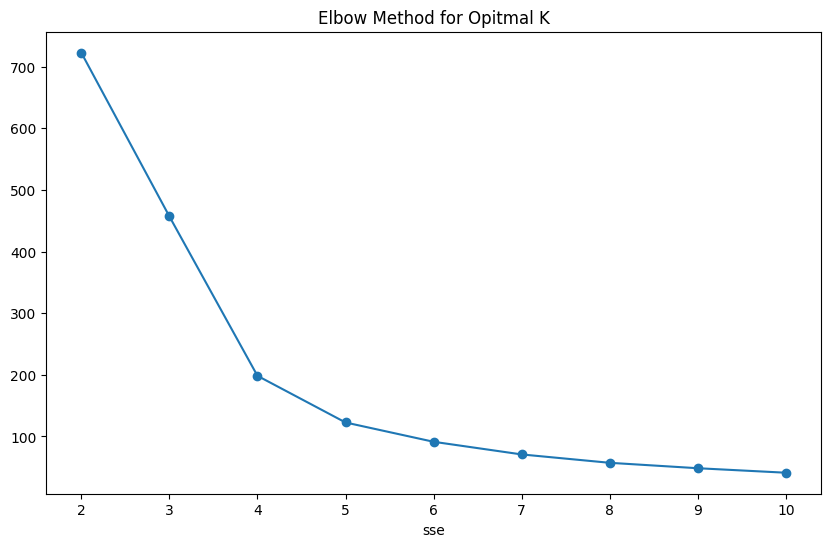

In [35]:
## 최적의 K값 찾는 방법은?
## 클러스터의 군집중심점 거리, 실루엣, 엘보우, 시각화를 통해 적정한 K를 찾기 위해 진행

sse = []
k_range = range(2,11)

for k in k_range:
    kmeans=KMeans(n_clusters= k, random_state=111)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Opitmal K')
plt.xlabel('Number of clusters')
plt.xlabel('sse')

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/

Text(0.5, 0, 'silhouette_scores')

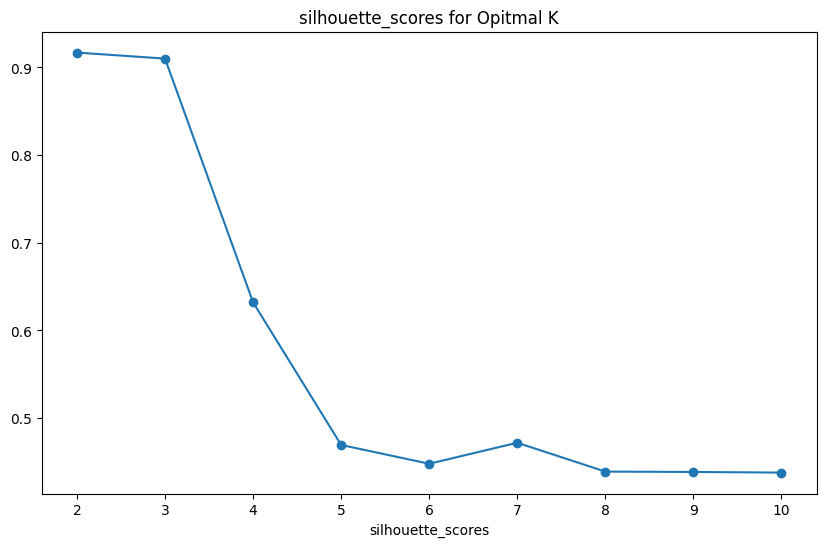

In [37]:
##실루엣 통한 최적의 K를 찾아보자!
silhouette_scores = []

for k in k_range:
    kmeans=KMeans(n_clusters= k, random_state=111)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('silhouette_scores for Opitmal K')
plt.xlabel('Number of clusters')
plt.xlabel('silhouette_scores')

In [39]:
## 최적의 클러스터 수를 4로 확인하고 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=111)
feature_matrix['cluster']=kmeans.fit_predict(X_scaled)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
feature_matrix

,COUNT(transactions),MEAN(transactions.Price),MEAN(transactions.Quantity),MEDIAN(transactions.Price),MEDIAN(transactions.Quantity),SUM(transactions.Price),SUM(transactions.Quantity),DAY(first_transactions_time),MONTH(first_transactions_time),YEAR(first_transactions_time),cluster
Customer ID,,,,,,,,,,,
13085.0,26,3.425000,14.461538,2.55,12.0,89.05,376.0,1,12,2009,0
13078.0,19,3.730526,10.157895,3.39,12.0,70.88,193.0,1,12,2009,0
15362.0,23,3.628261,6.304348,2.95,6.0,83.45,145.0,1,12,2009,0
18102.0,30,2.635000,255.033333,2.45,60.0,79.05,7651.0,1,12,2009,0
12682.0,19,3.560000,11.526316,1.65,12.0,67.64,219.0,1,12,2009,0
...,...,...,...,...,...,...,...,...,...,...,...
14286.0,76,1.350000,22.197368,0.85,24.0,102.60,1687.0,4,12,2009,1
13154.0,18,3.341667,8.444444,3.50,6.0,60.15,152.0,4,12,2009,0
14564.0,39,3.737949,11.256410,2.55,8.0,145.78,439.0,4,12,2009,1


In [44]:
#데이터 병합 완료
df_with_cluster=df.merge(feature_matrix[['cluster']], left_on ='Customer ID',right_index =True, how='left')

In [47]:
df_with_cluster.groupby('cluster').agg({
    'Quantity':['count','mean','std','min','max','median','sum'],
    'Price':['count','mean','std','min','max','median','sum'],
})

Quantity                                                 Price  \
           count       mean         std  min   max median    sum count   
cluster                                                                  
0           3803  21.278727  151.991687 -600  5184    6.0  80923  3803   
1           3382   6.183028   12.700678  -81   288    2.0  20911  3382   
2              2   1.000000    0.000000    1     1    1.0      2     2   
3              8  53.875000   97.568200   -1   288   12.0    431     8   

                                                                   
               mean         std     min      max median       sum  
cluster                                                            
0          3.138830    3.583577    0.00    79.95    2.1  11936.97  
1          2.940027    2.949920    0.10    50.00    2.1   9943.17  
2        135.500000    7.778175  130.00   141.00  135.5    271.00  
3        252.428750  705.520049    0.29  1998.49    3.8   2019.43

## RFM Metrics로 고객분석 전처리 진행하기!
- Recency
    - 특정 일과 가장 최근에 주문한 일의 차이
- Frequency
    - 주문 빈도
- Monetary
    - 주문 금액
---- 
- 고객 세그먼트 나눌 때 대표적으로 분석하는 방법 RFM, RFM-C, RFM-D, RFM-N

----
- 고객 seg를 전처리를 통해 직접 만들 수 있다.
- 코호트 분석까지 진행 가능하다.

In [103]:
df = pd.read_excel('online_retail_II.xlsx')

In [50]:
df['InvoiceDate'].max()

Timestamp('2009-12-04 09:37:00')

- 2009-12-04
- 2010-01-04 # 한달의 기간 동안에 얼마나 고객이 재구매 하는지? 확인해 보는 것
- A. 구매 2009-11-25
- A. 구매 2009-12-01
    - 가장 최근은 2009-12-01
    - 가장 최근에 구매한 날짜를 비교해서 특정일과 차이를 계산한다.

In [52]:
import datetime as dt

In [55]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,transaction_id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,4
...,...,...,...,...,...,...,...,...,...
9672,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,9672
9673,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,9673
9674,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,9674
9675,490147,21490,SET OF THREE 50'S GIFT WRAPS,48,2009-12-04 09:31:00,1.65,13408.0,United Kingdom,9675


In [119]:
today_date = dt.datetime(2010,12,10)

rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'Invoice': lambda x: x.nunique(),
                                    'Price': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
#rfm['monetary'] = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()

rfm.head()

,Customer ID,recency,frequency,monetary
0,12346.0,66,15,578.36
1,12347.0,2,2,162.95
2,12348.0,73,1,14.39
3,12349.0,42,4,899.49
4,12351.0,10,1,49.46


## RFM Scores
- 분석가가 직접 계산해서 만드는 것 
- 어떤 방법 보다는 도메인에 따라 주관적인 해석으로 만들기!

In [120]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)

In [121]:
rfm

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346.0,66,15,578.36,3,5,5,35
1,12347.0,2,2,162.95,5,2,3,52
2,12348.0,73,1,14.39,2,1,1,21
3,12349.0,42,4,899.49,3,3,5,33
4,12351.0,10,1,49.46,5,1,2,51
...,...,...,...,...,...,...,...,...
4378,18283.0,17,6,498.82,4,4,5,44
4379,18284.0,64,2,116.09,3,3,3,33
4380,18285.0,295,1,100.20,1,2,2,12
4381,18286.0,111,3,306.55,2,3,4,23


In [122]:
#전처리한 스코어를 가지고 태깅작업도 가능하다.

seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,66,15,578.36,3,5,5,35,loyal_customers
1,12347.0,2,2,162.95,5,2,3,52,potential_loyalists
2,12348.0,73,1,14.39,2,1,1,21,hibernating
3,12349.0,42,4,899.49,3,3,5,33,need_attention
4,12351.0,10,1,49.46,5,1,2,51,new_customers


In [83]:
import squarify

In [89]:
segments

hibernatin             80
at_risk                80
loyal                  52
potential_loyalties    46
cant loose             38
primising              22
new_customers           2
champions               1
Name: segment, dtype: int64

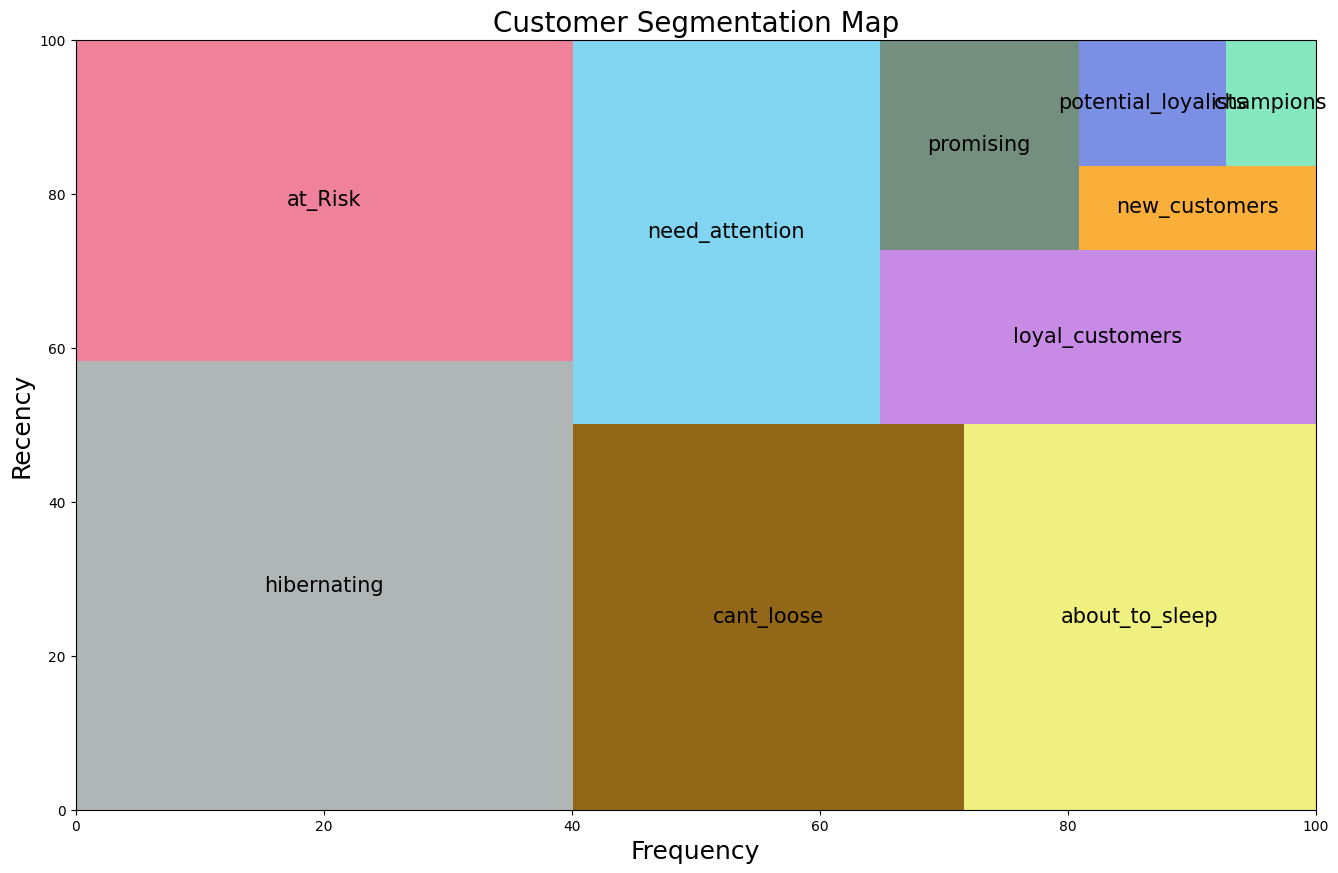

In [123]:
## 고객들의 간단한 시각화

segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

In [124]:
rfm.groupby('segment')[['recency','monetary','frequency']].agg({'mean','median','std','max','min'})

recency                                    monetary  \
                        max        std        mean min median       max   
segment                                                                   
about_to_sleep           69  10.078349   51.462857  35   51.5    786.34   
at_Risk                 373  72.416483  153.279743  70  134.5  33628.55   
cant_loose              274  50.067847  122.637363  70  109.0   6277.08   
champions                14   4.612502    5.843931   0    6.0  40282.40   
hibernating             373  90.553819  214.790244  70  213.0  25111.09   
loyal_customers          69  16.035117   35.560109  15   31.0  39920.95   
need_attention           69  10.138805   51.520833  35   52.0   1996.51   
new_customers            14   3.966821    7.403846   0    8.0    336.24   
potential_loyalists      34   9.680611   16.966790   0   17.0   1395.64   
promising                34   5.170537   23.364706  15   23.0    551.47   

                                                            frequency  \
                             std        mean   min   median       max   
segment                                                                 
about_to_sleep         99.583656   91.732057  0.42   65.345         2   
at_Risk              1912.803064  334.249873  2.67  142.885         7   
cant_loose            849.335058  586.398791  3.54  366.660        53   
champions            2309.285003  909.851711  1.92  500.700       270   
hibernating           848.257364  126.076609  0.00   54.090         2   
loyal_customers      1661.592111  596.212874  2.96  355.775        51   
need_attention        224.507488  198.808490  0.96  133.210         4   
new_customers          69.206422   77.571923  2.95   56.390         1   
potential_loyalists   136.916376  156.425943  0.72  128.625         4   
promising              95.419961   88.820588  2.07   61.880         1   

                                                      
                           std       mean min median  
segment                                               
about_to_sleep        0.468238   1.322857   1    1.0  
at_Risk               1.378753   3.606109   2    3.0  
cant_loose            6.387488  11.000000   7    9.0  
champions            20.955947  15.325145   4   10.0  
hibernating           0.408718   1.211707   1    1.0  
loyal_customers       5.433132   8.331967   4    7.0  
need_attention        0.633558   2.833333   2    3.0  
new_customers         0.000000   1.000000   1    1.0  
potential_loyalists   0.809263   2.311808   1    2.0  
promising             0.000000   1.000000   1    1.0

## RFM시각화

In [127]:
sns.set_style('whitegrid')
palette = 'Set2'

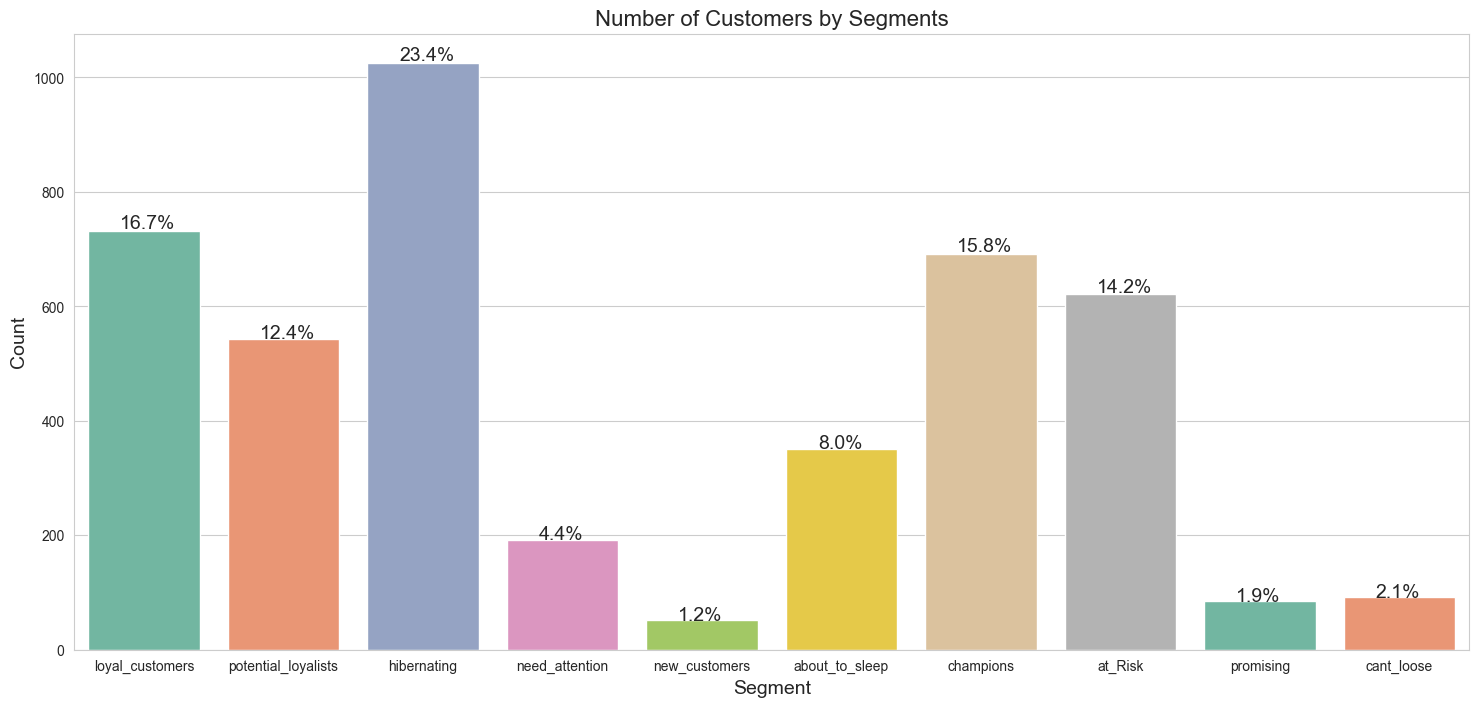

In [128]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

<AxesSubplot: xlabel='frequency', ylabel='monetary'>

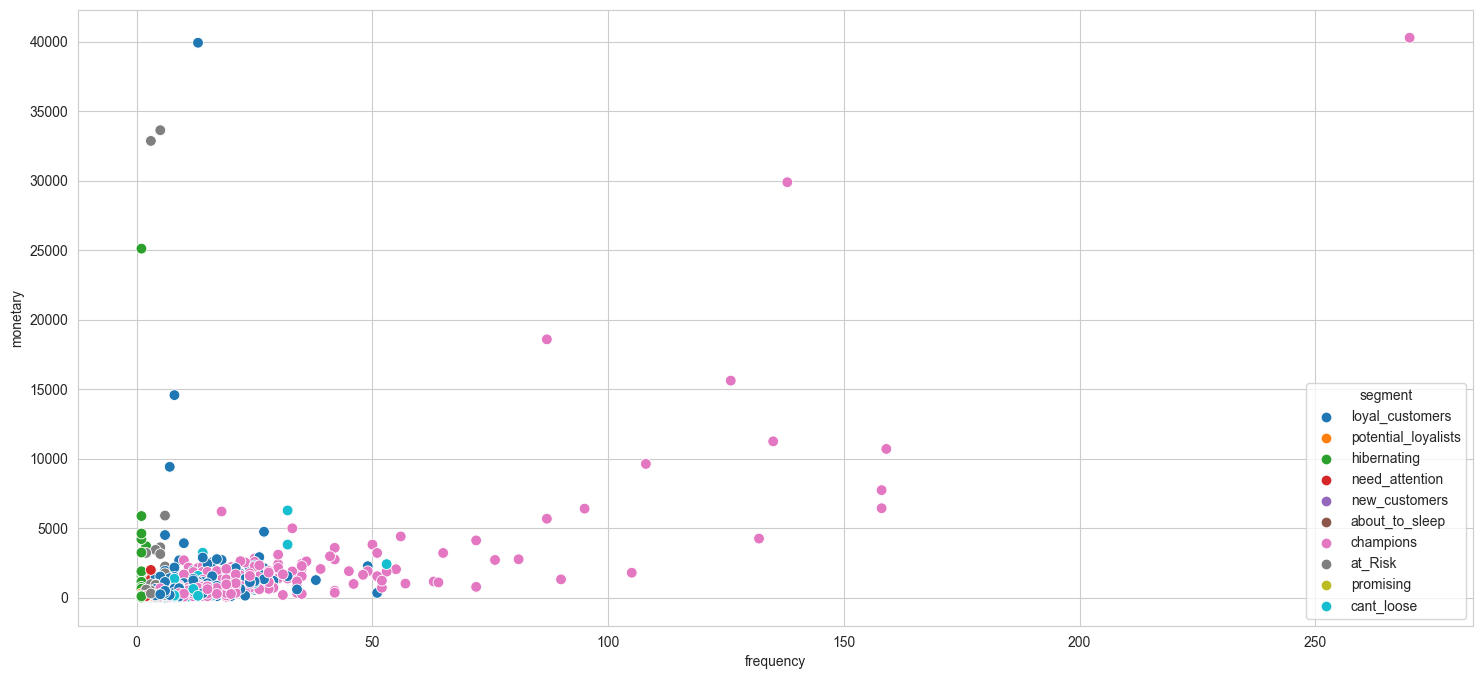

In [129]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.scatterplot(
    data=rfm, x='frequency',y='monetary',hue='segment', s=60
 )

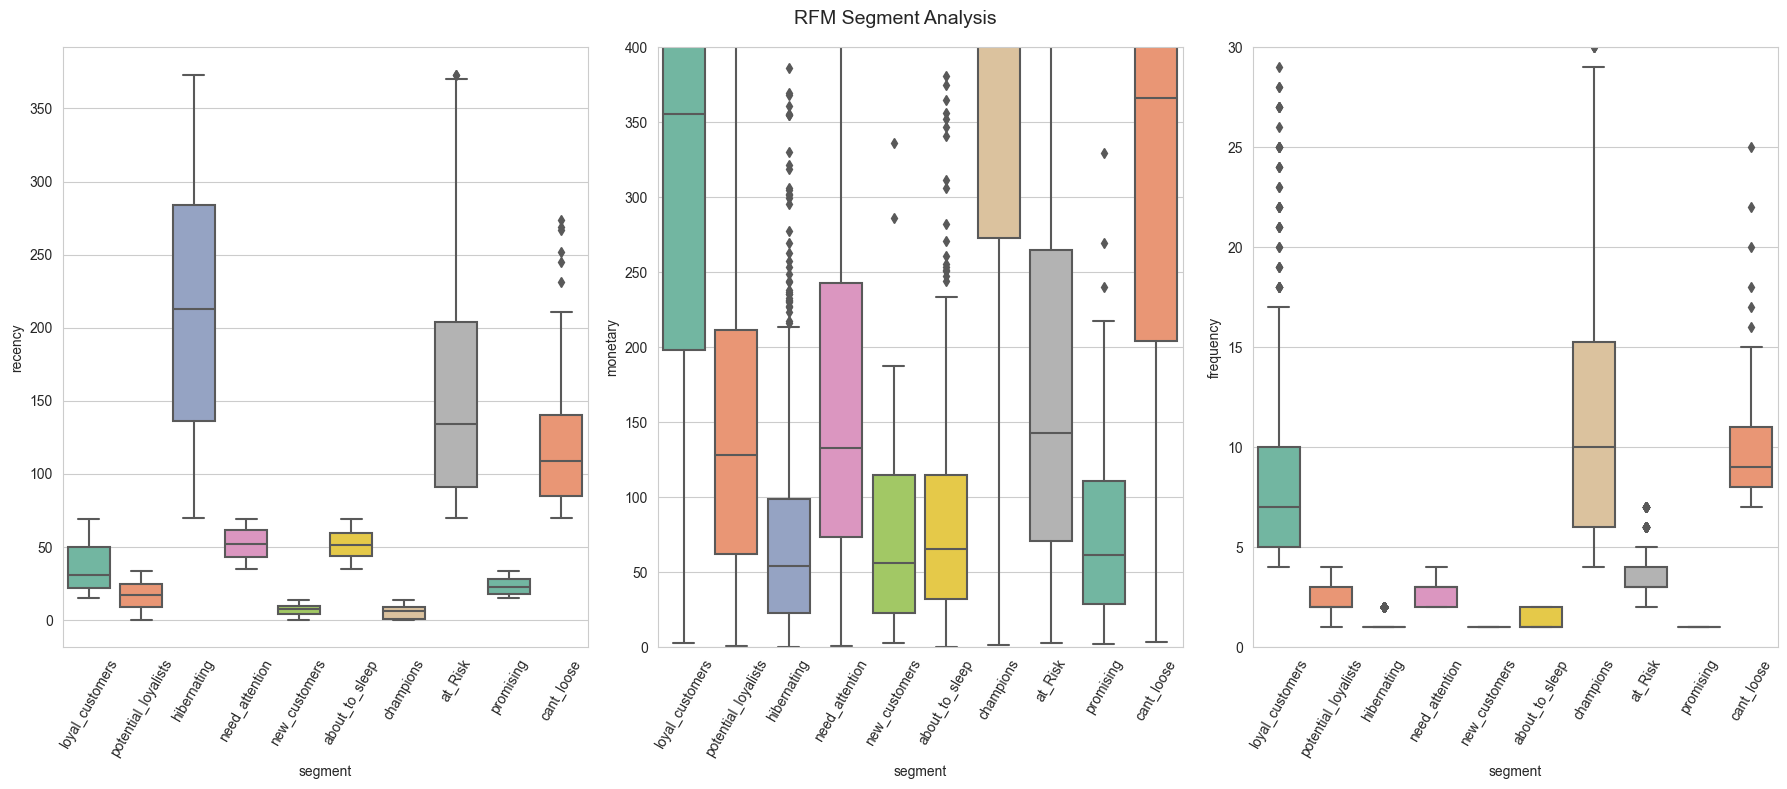

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

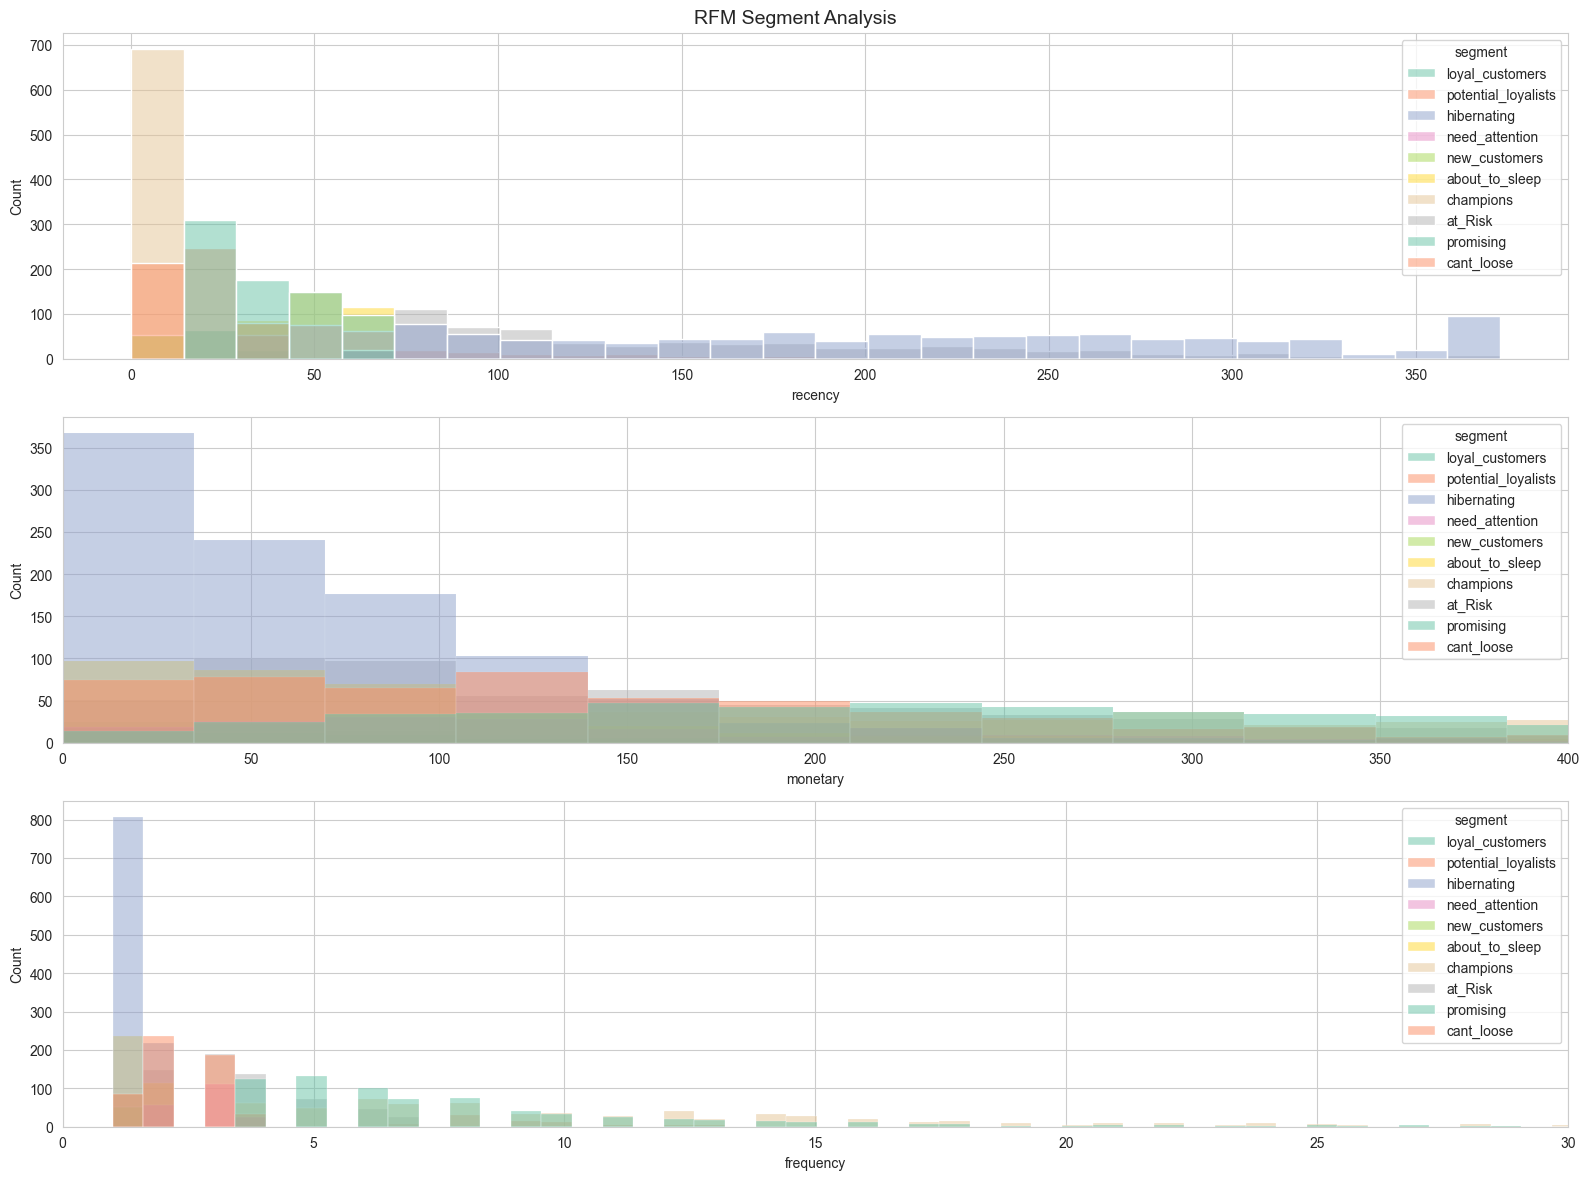

In [131]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

## Cohort Analysis

In [101]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,transaction_id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,4
...,...,...,...,...,...,...,...,...,...
9672,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom,9672
9673,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,9673
9674,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom,9674
9675,490147,21490,SET OF THREE 50'S GIFT WRAPS,48,2009-12-04 09:31:00,1.65,13408.0,United Kingdom,9675


In [135]:
from operator import attrgetter
import matplotlib.colors as mcolors


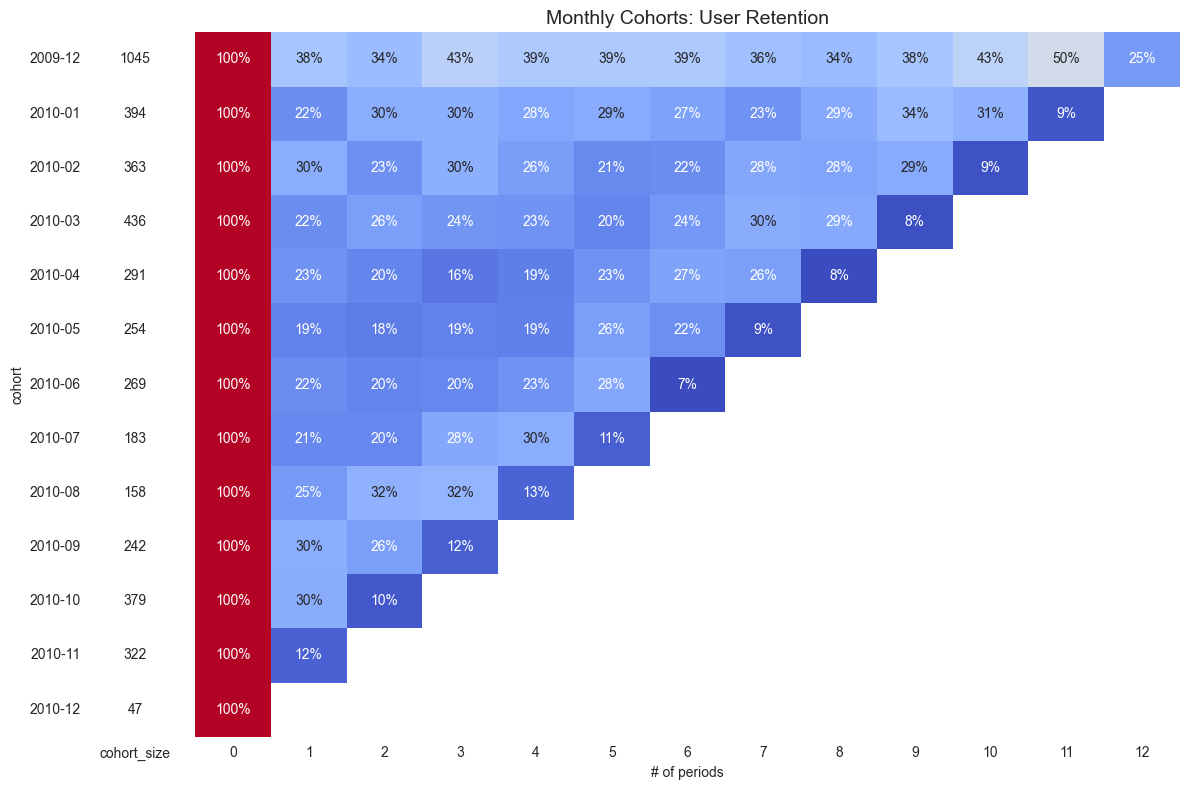

In [136]:
def CohortAnalysis(dataframe):
    
    # 입력된 데이터프레임을 복사하여 사용
    data = dataframe.copy()
    
    # 중복된 Customer ID, Invoice, InvoiceDate 열을 제거한 후 데이터프레임 생성
    data = data[["Customer ID", "Invoice", "InvoiceDate"]].drop_duplicates()
    
    # 주문 월을 계산하여 order_month 열에 추가
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")
    
    # 각 고객이 처음 주문한 날짜의 월을 계산하여 cohort 열에 추가
    data["cohort"] = (
        data.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")
    )
    
    # 코호트와 주문 월별로 고객 수를 계산
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("Customer ID", "nunique"))
        .reset_index(drop=False)
    )
    
    # 기간 번호를 계산하여 period_number 열에 추가
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )
    
    # 피벗 테이블을 생성하여 코호트별 기간 번호에 따른 고객 수를 계산
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    
    # 각 코호트의 고객 수를 계산
    cohort_size = cohort_pivot.iloc[:, 0]
    
    # 유지율 매트릭스를 생성 (각 코호트별 기간 동안 남아있는 고객 비율)
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    
    # 유지율을 히트맵으로 시각화
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        
        # 고객 유지율 히트맵 그리기
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),  # 데이터가 없는 부분은 마스킹
            annot=True,  # 각 셀에 값 표시
            cbar=False,  # 컬러 바는 표시하지 않음
            fmt=".0%",  # 퍼센트 포맷
            cmap="coolwarm",  # 컬러맵 설정
            ax=ax[1],  # 두 번째 축에 그리기
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)  # 그래프 제목 설정
        ax[1].set(xlabel="# of periods", ylabel="")  # x축 라벨 설정, y축 라벨은 빈칸
        
        # 첫 번째 축에 각 코호트의 고객 수를 히트맵으로 그리기 (하얀색 컬러맵 사용)
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),  # 코호트 사이즈를 데이터프레임으로 변환
            annot=True,  # 각 셀에 값 표시
            cbar=False,  # 컬러 바는 표시하지 않음
            fmt="g",  # 숫자 포맷
            cmap=white_cmap,  # 하얀색 컬러맵 사용
            ax=ax[0],  # 첫 번째 축에 그리기
        )
        fig.tight_layout()  # 레이아웃 조정

# 예시: 데이터프레임 df에 대해 CohortAnalysis 함수 실행
CohortAnalysis(df)

    